In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from netcal.scaling import TemperatureScaling
from netcal.metrics import ECE
from netcal.presentation import ReliabilityDiagram
from netcal.binning import IsotonicRegression
from netcal.binning import HistogramBinning
import tikzplotlib 
import os

In [6]:
base_dir = "dcase"
confidences = None
ground_truth = None
if base_dir == "fsd50":
    confidences = np.loadtxt(f"{base_dir}/confidences_3935_classes_100_epochs.txt")
    ground_truth = np.loadtxt(f"{base_dir}/ground_truth_3935_classes_100_epochs.txt")
elif base_dir == "dcase":
    confidences = np.loadtxt(f"{base_dir}/confidences.txt")
    ground_truth = np.loadtxt(f"{base_dir}/ground_truth.txt")
else:
    raise Exception()
max_array = confidences.max(axis=1)
argmax_array = confidences.argmax(axis=1)
correct = ground_truth == confidences.argmax(axis=1)
sum_true = np.sum(correct)
total = correct.size
acc = sum_true / total
print(f'Sum of True: {sum_true}, Total: {total}, Ratio: {acc:.2f}')

Sum of True: 853, Total: 936, Ratio: 0.91


In [7]:
diagrams_path = f"{base_dir}/diagrams"
if not os.path.exists(diagrams_path):
    os.mkdir(diagrams_path )
n_bins = 10
diagram = ReliabilityDiagram(n_bins)
ece = ECE(n_bins)


uncalibrated_score: 4.407436763628935%


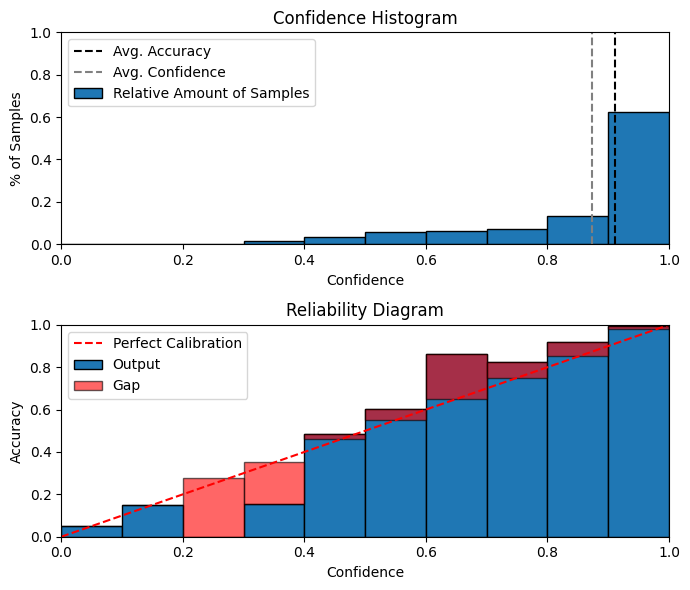

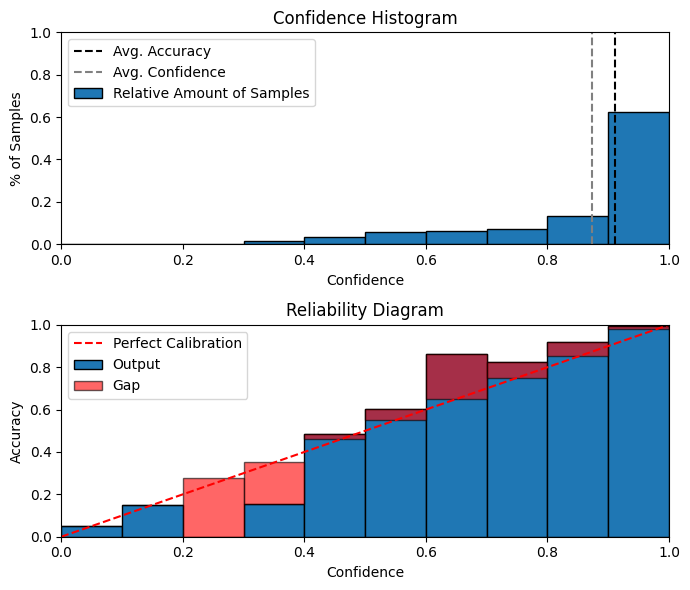

In [8]:
uncalibrated_score = ece.measure(confidences, ground_truth)
print(f"uncalibrated_score: {uncalibrated_score * 100}%")
file_name = f"{diagrams_path}/acc_{acc}_uncalibrated_ece_{uncalibrated_score * 100}_diagram.png"
diagram.plot(confidences, ground_truth, tikz=False, filename=file_name)

For temperature: 1.328299975082029
temperature_calibrated_score: 2.3917404745998803%


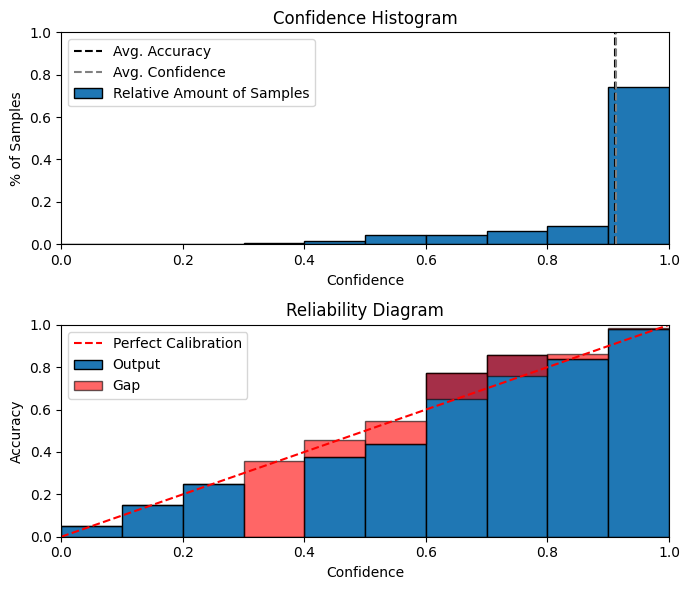

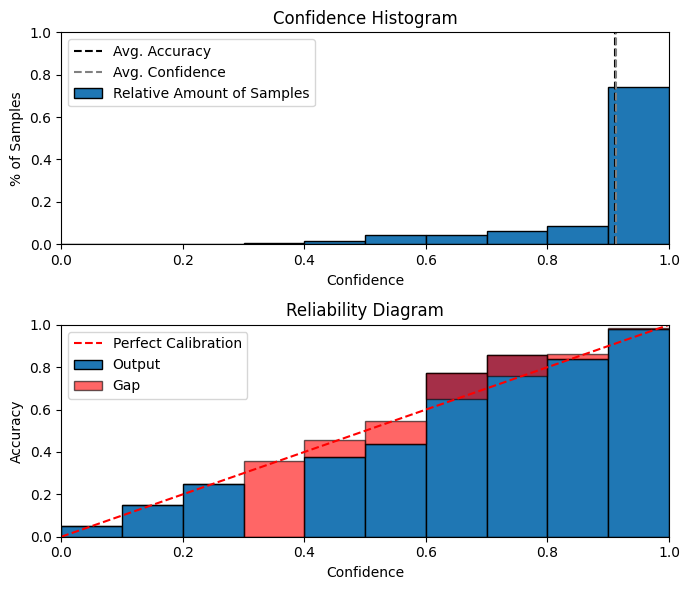

In [9]:
temperature = TemperatureScaling()
temperature.fit(confidences, ground_truth)
calibrated = temperature.transform(confidences)
temperature_calibrated_score = ece.measure(calibrated, ground_truth)
print(f"For temperature: {temperature.weights[0]}")
print(f"temperature_calibrated_score: {temperature_calibrated_score * 100}%")
file_name = f"{diagrams_path}/acc_{acc}_temp_{temperature.weights[0]}_ece_{temperature_calibrated_score * 100}_diagram.png"
# diagram.plot(calibrated, ground_truth)
diagram.plot(calibrated, ground_truth, tikz=False, filename=file_name)

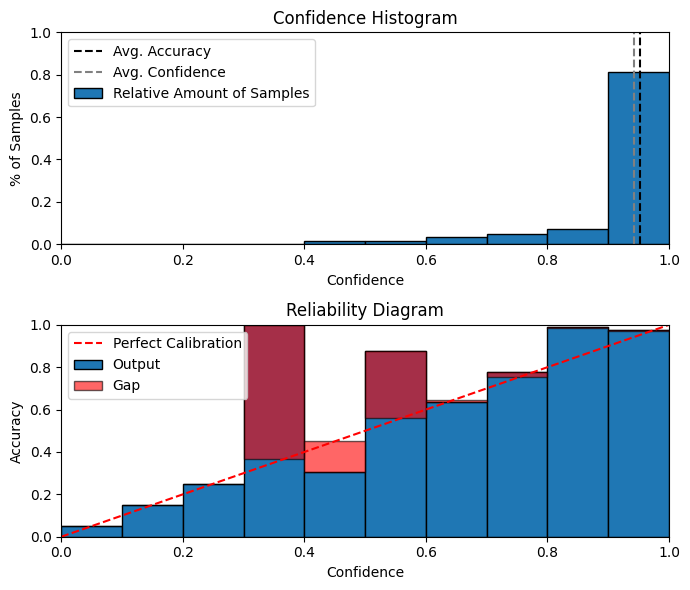

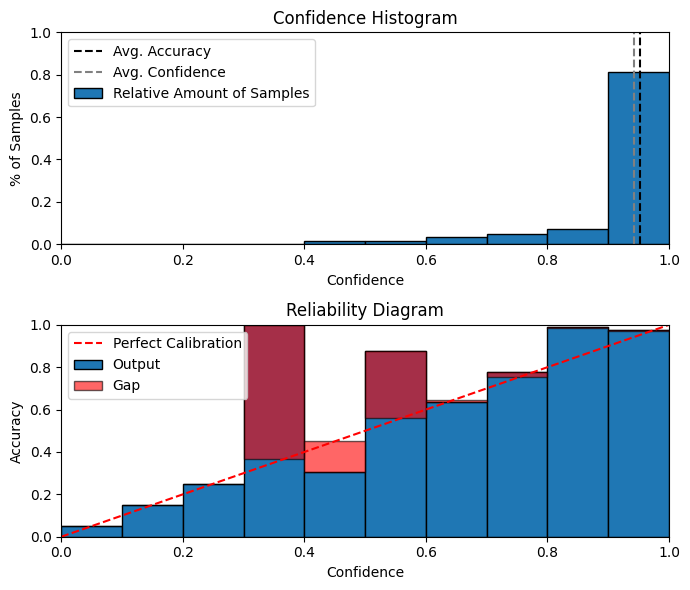

In [10]:
iso = IsotonicRegression()
iso.fit(confidences, ground_truth)
calibrated = iso.transform(confidences)
ece = ECE(n_bins)
isotonic_calibrated_score = ece.measure(calibrated, ground_truth)
diagram = ReliabilityDiagram(n_bins)
# diagram.plot(calibrated, ground_truth)
diagram.plot(calibrated, ground_truth, tikz=False, filename=f"{diagrams_path}/acc_{acc}_isotonic_ece_{isotonic_calibrated_score * 100}_diagram.png")

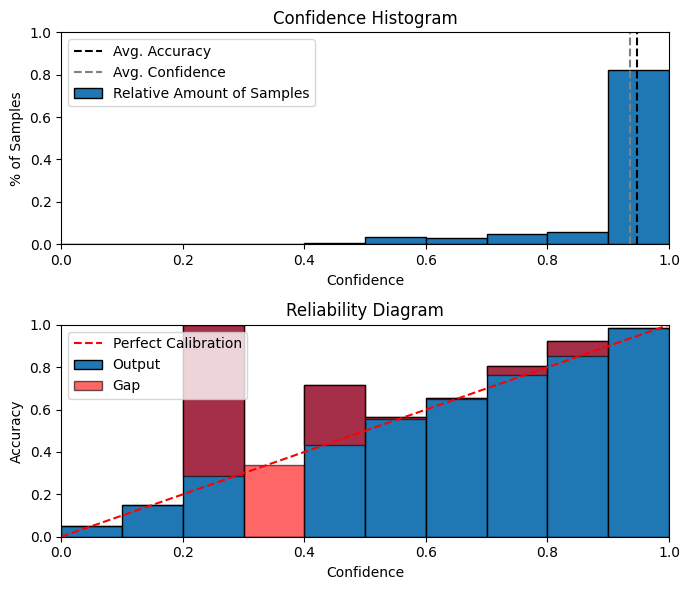

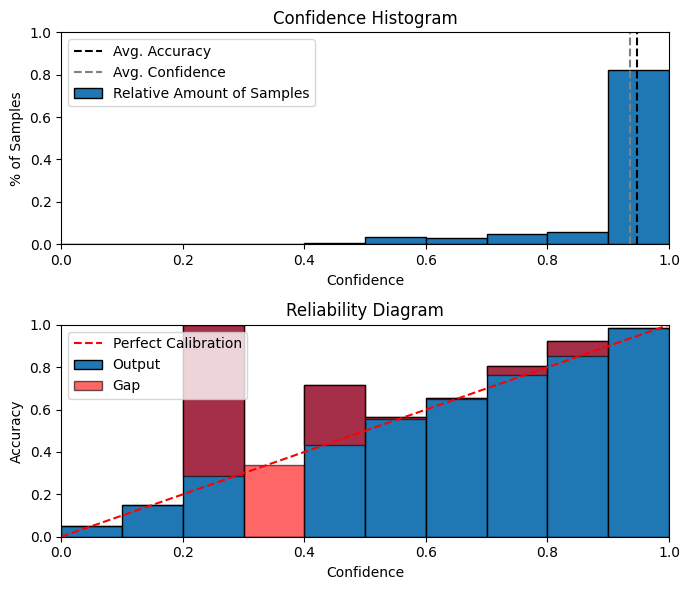

In [11]:
hist = HistogramBinning()
hist.fit(confidences, ground_truth)
calibrated = hist.transform(confidences)
ece = ECE(n_bins)
uncalibrated_score = ece.measure(confidences, ground_truth)
histogram_calibrated_score = ece.measure(calibrated, ground_truth)
diagram = ReliabilityDiagram(n_bins)
# diagram.plot(calibrated, ground_truth)
diagram.plot(calibrated, ground_truth, tikz=False, filename=f"{diagrams_path}/acc_{acc}_histogram_binning_ece_{histogram_calibrated_score * 100}_diagram.png")
